# Research Question 2: customers' characteristics and campaign engagement

# Basic set up

Import the packages needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
%store -r df

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Martial_Status
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,1,0,0,0,0,0,1,0,SP,Divorced
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,5,0,0,0,0,1,1,0,CA,Single
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,2,0,0,0,0,0,0,0,US,Married
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,7,0,0,0,0,0,0,0,AUS,Together
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,7,1,0,0,0,0,1,0,SP,Single


In [4]:
df_cam = df[ df[ 'Response'] == 1]
df_nocam = df[ df[ 'Response'] == 0]
# To investigate the characteristics of customers who accepted the offer in the last campaign.

In [5]:
df_cam.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Martial_Status
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,1,0,0,0,0,0,1,0,SP,Divorced
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,5,0,0,0,0,1,1,0,CA,Single
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,7,1,0,0,0,0,1,0,SP,Single
5,7348,1958,PhD,Single,71691.0,0,0,3/17/14,0,336,...,2,0,0,0,0,0,1,0,SP,Single
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/14,0,769,...,6,1,0,0,0,0,1,0,GER,Married


In [6]:
df_nocam.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Martial_Status
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,2,0,0,0,0,0,0,0,US,Married
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,7,0,0,0,0,0,0,0,AUS,Together
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/14,0,78,...,5,0,0,0,0,0,0,0,SP,Together
8,4047,1954,PhD,Married,65324.0,0,1,1/11/14,0,384,...,4,0,0,0,0,0,0,0,US,Married
9,9477,1954,PhD,Married,65324.0,0,1,1/11/14,0,384,...,4,0,0,0,0,0,0,0,IND,Married


## Year of Birth

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

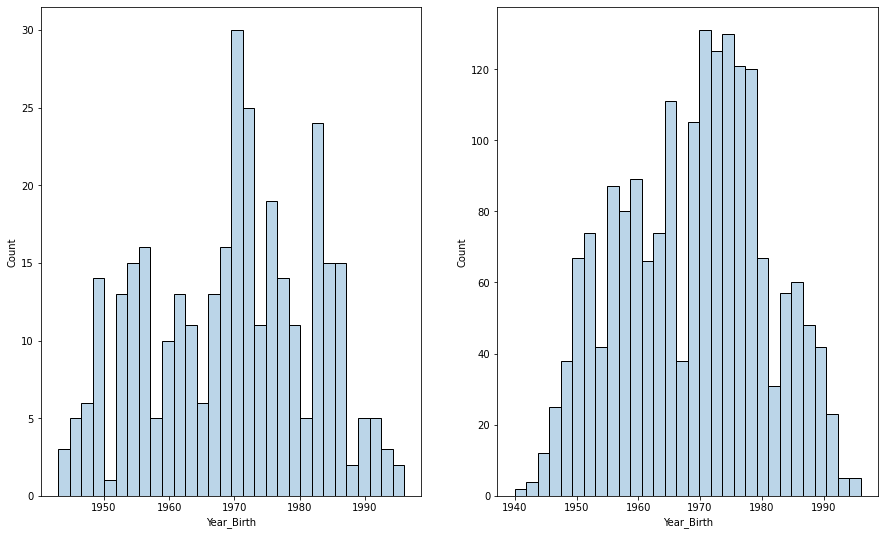

In [7]:
fig, axs = plt.subplots( ncols = 2, nrows = 1, figsize = (15, 9))
sns.histplot( df_cam[ 'Year_Birth'], alpha = 0.3, bins = 30, ax = axs[0])
sns.histplot( df_nocam[ 'Year_Birth'], alpha = 0.3, bins = 30, ax = axs[1])

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

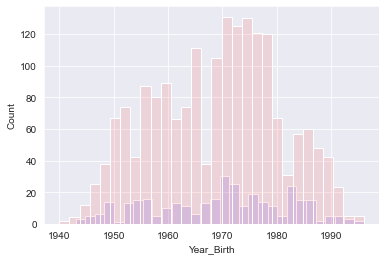

In [8]:
sns.set_style( 'darkgrid')
sns.histplot( df_cam[ 'Year_Birth'], alpha = 0.1, bins = 30, color = 'blue')
sns.histplot( df_nocam[ 'Year_Birth'], alpha = 0.1, bins = 30, color = 'red')

The distributions of ages of customers who did and did not accept the offer of the last campaign are similar.

## Education

<AxesSubplot:xlabel='Education', ylabel='count'>

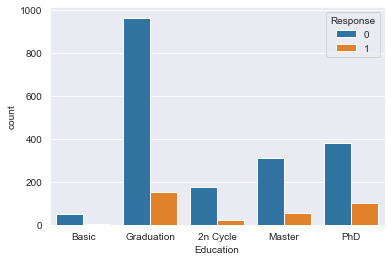

In [9]:
sns.set_style( 'darkgrid')
sns.countplot( x = 'Education', data = df, hue = 'Response')

Distributions of education level are similar. Those with basic education and in the 2nd cycle seem to be relatively more reluctant to accept the offer in the last campaign.

## Marital Status

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

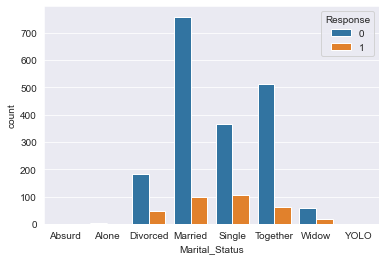

In [10]:
sns.set_style( 'darkgrid')
sns.countplot( x = 'Marital_Status', data = df, hue = 'Response')

In [11]:
df[ 'Response'] = df[ 'Response'].astype( 'category')
marital_pivot = pd.pivot_table( data = df, columns = 'Response', values = 'ID',
                               index = 'Marital_Status', aggfunc = 'count')

In [12]:
marital_pivot = pd.concat( [marital_pivot, (marital_pivot[ 1] / (marital_pivot[ 0] + marital_pivot[ 1]))], axis = 1)

In [13]:
marital_pivot

,0,1,0
Marital_Status,,,
Absurd,1,1,0.500000
Alone,2,1,0.333333
Divorced,183,48,0.207792
Married,759,98,0.114352
Single,364,106,0.225532
Together,511,60,0.105079
Widow,58,18,0.236842
YOLO,1,1,0.500000


In [14]:
marital_pivot.columns = ['Rejected', 'Accepted', 'Percentage of Accepted']

In [15]:
marital_pivot

,Rejected,Accepted,Percentage of Accepted
Marital_Status,,,
Absurd,1,1,0.500000
Alone,2,1,0.333333
Divorced,183,48,0.207792
Married,759,98,0.114352
Single,364,106,0.225532
Together,511,60,0.105079
Widow,58,18,0.236842
YOLO,1,1,0.500000


<AxesSubplot:xlabel='Marital_Status', ylabel='Percentage of Accepted'>

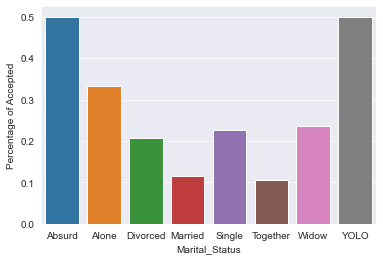

In [16]:
sns.barplot( x = marital_pivot.index, y = marital_pivot[ 'Percentage of Accepted'])

Ignoring those in absurd and YOLO status, as the sample size is too small, those being single (including alone, divorced, single, single, and widow) are more willing to accept the offer in the last campaign, in comparison to those being in a relationship (married or together).

### Numbers of kids and teens at home

<AxesSubplot:xlabel='Response', ylabel='Teenhome'>

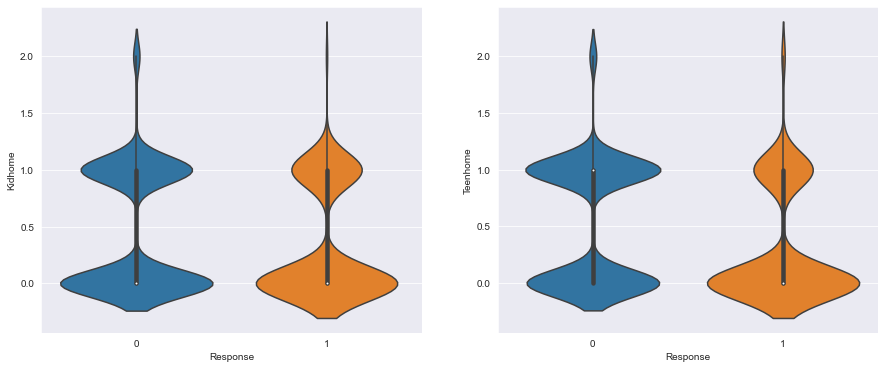

In [17]:
fig, axs = plt.subplots( ncols = 2, nrows = 1, figsize = (15,6))
sns.violinplot( x = 'Response', y = 'Kidhome', data = df, ax = axs[0])
sns.violinplot( x = 'Response', y = 'Teenhome', data = df, ax = axs[1])

In [18]:
kid_pivot = pd.pivot_table( data = df, index = 'Response', values = 'Kidhome', aggfunc = 'mean')
print( kid_pivot)

teen_pivot = pd.pivot_table( data = df, index = 'Response', values = 'Teenhome', aggfunc = 'mean')
print( teen_pivot)

           Kidhome
Response          
0         0.459287
1         0.342342
          Teenhome
Response          
0         0.541245
1         0.306306


Although the mean numbers of kids and teens at home is slightly smaller in those customers who accepted the offer in the last campaign, the different is trivial practically.

## Days since customers' first purchase

In [19]:
from datetime import datetime, date

df[ 'Days_Customer'] = ( datetime( 2014, 7, 28) - pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')).dt.days

Text(0.5, 1.0, 'Accepted the ofer')

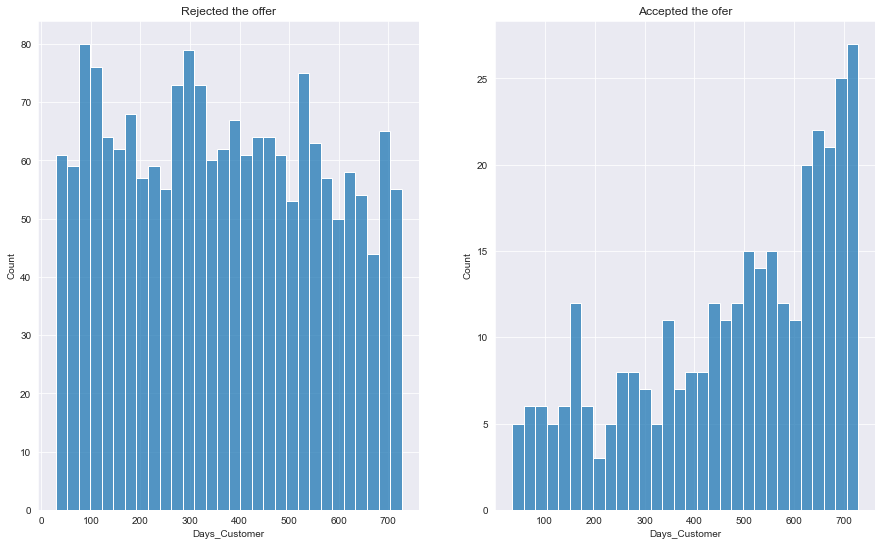

In [20]:
fig, axs = plt.subplots( ncols = 2, nrows = 1, figsize = (15,9))
sns.histplot( df[ df.Response == 0]['Days_Customer'], bins = 30, ax = axs[0])
sns.histplot( df[ df.Response == 1]['Days_Customer'], bins = 30, ax = axs[1])

axs[0].set_title( 'Rejected the offer')
axs[1].set_title( 'Accepted the ofer')

<AxesSubplot:xlabel='Days_Customer', ylabel='Density'>

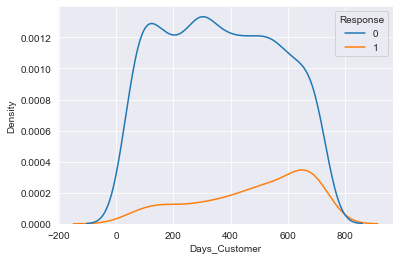

In [21]:
sns.kdeplot( df['Days_Customer'], hue = df[ 'Response'])

It is seen that customers enrolled earlier are more willing to accept the offer in the last campaign.

### Research question 3: Previous campaign engagement and last campaign engagement

### Data visualization

In [22]:
pv1 = pd.pivot_table( df, index = 'Response', columns = 'AcceptedCmp1', values = 'ID', aggfunc = 'count')
pv2 = pd.pivot_table( df, index = 'Response', columns = 'AcceptedCmp2', values = 'ID', aggfunc = 'count')
pv3 = pd.pivot_table( df, index = 'Response', columns = 'AcceptedCmp3', values = 'ID', aggfunc = 'count')
pv4 = pd.pivot_table( df, index = 'Response', columns = 'AcceptedCmp4', values = 'ID', aggfunc = 'count')
pv5 = pd.pivot_table( df, index = 'Response', columns = 'AcceptedCmp5', values = 'ID', aggfunc = 'count')

print( pv1, '\n\n', pv2, '\n\n', pv3, '\n\n', pv4, '\n\n', pv5)

AcceptedCmp1     0   1
Response              
0             1816  63
1              254  79 

 AcceptedCmp2     0   1
Response              
0             1869  10
1              313  20 

 AcceptedCmp3     0   1
Response              
0             1793  86
1              256  77 

 AcceptedCmp4     0    1
Response               
0             1777  102
1              271   62 

 AcceptedCmp5     0   1
Response              
0             1809  70
1              242  91


<AxesSubplot:xlabel='AcceptedCmp5', ylabel='Response'>

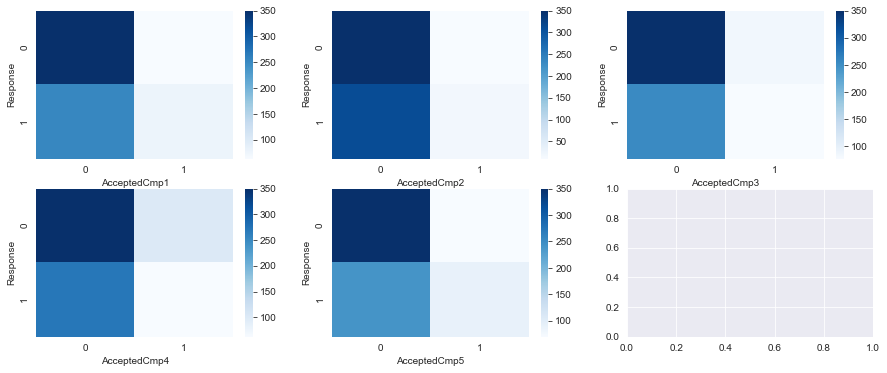

In [23]:
fig, axs = plt.subplots( ncols = 3, nrows = 2, figsize = (15, 6))

sns.heatmap( pv1, cmap = 'Blues', vmax = 350, ax = axs[ 0,0])
sns.heatmap( pv2, cmap = 'Blues', vmax = 350, ax = axs[ 0,1])
sns.heatmap( pv3, cmap = 'Blues', vmax = 350, ax = axs[ 0,2])
sns.heatmap( pv4, cmap = 'Blues', vmax = 350, ax = axs[ 1,0])
sns.heatmap( pv5, cmap = 'Blues', vmax = 350, ax = axs[ 1,1])

It is seen that most of the customers did not accept the offer in the recent and the past campaigns. While the likelihood accepting the offer is around half if they had accepted it before, their likelihood of accepting is extremely low if they did not accepted an offer before.

However, it is worth noting that among those who accepted the recent offer, most of them did not accept at least one of the previous offers.

## Machine Learning

Logistic regression, decision tree & random forest and support vector machine will be used to predict acceptance of offer in the last campaign with previous campaign engagement.

### Logistic Regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [25]:
X = df[ ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]
y = df[ 'Response']
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split( X, y, test_size = 0.1)

In [26]:
logmodel = LogisticRegression()

In [27]:
logmodel.fit( X_train_log, y_train_log)
predictions_log = logmodel.predict( X_test_log)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
print( confusion_matrix( predictions_log, y_test_log, labels = [1, 0]))
print( 'True Positive = 4')
print( 'False Positive = 27')
print( 'False Negative = 0')
print( 'True Negative = 191')
print( '\n')
print( classification_report( predictions_log, y_test_log))

[[  7   2]
 [ 34 179]]
True Positive = 4
False Positive = 27
False Negative = 0
True Negative = 191


              precision    recall  f1-score   support

           0       0.99      0.84      0.91       213
           1       0.17      0.78      0.28         9

    accuracy                           0.84       222
   macro avg       0.58      0.81      0.59       222
weighted avg       0.96      0.84      0.88       222



### Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
X_train_dtree, X_test_dtree, y_train_dtree, y_test_dtree = train_test_split( X, y, test_size = 0.1)

In [32]:
dtree = DecisionTreeClassifier()

In [33]:
dtree.fit( X_train_dtree, y_train_dtree)
predictions_dtree = dtree.predict( X_test_dtree)

In [34]:
print( confusion_matrix( predictions_dtree, y_test_dtree, labels = [1, 0]))
print( 'True Positive = 8')
print( 'False Positive = 28')
print( 'False Negative = 5')
print( 'True Negative = 181')
print( '\n')
print( classification_report( predictions_dtree, y_test_dtree))

[[  4   2]
 [ 25 191]]
True Positive = 8
False Positive = 28
False Negative = 5
True Negative = 181


              precision    recall  f1-score   support

           0       0.99      0.88      0.93       216
           1       0.14      0.67      0.23         6

    accuracy                           0.88       222
   macro avg       0.56      0.78      0.58       222
weighted avg       0.97      0.88      0.91       222



### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = train_test_split( X, y, test_size = 0.1)

In [37]:
rfc = RandomForestClassifier()
rfc.fit( X_train_rfc, y_train_rfc)
predictions_rfc = rfc.predict( X_test_rfc)

In [38]:
print( confusion_matrix( predictions_rfc, y_test_rfc, labels = [1, 0]))
print( 'True Positive = 6')
print( 'False Positive = 23')
print( 'False Negative = 0')
print( 'True Negative = 193')
print( '\n')
print( classification_report( predictions_rfc, y_test_rfc))

[[  4   0]
 [ 24 194]]
True Positive = 6
False Positive = 23
False Negative = 0
True Negative = 193


              precision    recall  f1-score   support

           0       1.00      0.89      0.94       218
           1       0.14      1.00      0.25         4

    accuracy                           0.89       222
   macro avg       0.57      0.94      0.60       222
weighted avg       0.98      0.89      0.93       222



### Support Vector Machine

In [39]:
from sklearn.svm import SVC

In [40]:
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split( X, y, test_size = 0.1)

In [41]:
svc = SVC()
svc.fit( X_train_svc, y_train_svc)
predictions_svc = svc.predict( X_test_svc)

In [42]:
print( confusion_matrix( predictions_svc, y_test_svc, labels = [1, 0]))
print( 'True Positive = 10')
print( 'False Positive = 34')
print( 'False Negative = 3')
print( 'True Negative = 175')
print( '\n')
print( classification_report( predictions_svc, y_test_svc))

[[  8   7]
 [ 23 184]]
True Positive = 10
False Positive = 34
False Negative = 3
True Negative = 175


              precision    recall  f1-score   support

           0       0.96      0.89      0.92       207
           1       0.26      0.53      0.35        15

    accuracy                           0.86       222
   macro avg       0.61      0.71      0.64       222
weighted avg       0.92      0.86      0.89       222



In [43]:
print( 'Logistic Regression')
print( classification_report( predictions_log, y_test_log), '\n')

print( 'Decision Tree')
print( classification_report( predictions_dtree, y_test_dtree), '\n')

print( 'Random Forest')
print( classification_report( predictions_rfc, y_test_rfc), '\n')

print( 'Support Vector Machine')
print( classification_report( predictions_svc, y_test_svc), '\n')

Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       213
           1       0.17      0.78      0.28         9

    accuracy                           0.84       222
   macro avg       0.58      0.81      0.59       222
weighted avg       0.96      0.84      0.88       222
 

Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       216
           1       0.14      0.67      0.23         6

    accuracy                           0.88       222
   macro avg       0.56      0.78      0.58       222
weighted avg       0.97      0.88      0.91       222
 

Random Forest
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       218
           1       0.14      1.00      0.25         4

    accuracy                           0.89       222
   macro avg       0.57      0.94      0.60       222
weighted avg       0.9

4 machine learning algorithms perform similarly in predicting customers' acceptance of the offer in the last campaign with their previous engagement. With the high recall rate and precision for non-engagement, it is shown that previous engagement in campaigns are associated with whether they accepted the offer in the last campaign.

# Insights

__Characteristics and offer acceptance in the last campaign__

For customers' characteristics, it was found that the last campaign attracted more single customers than customers in a romantic relationship. The marketing team should look into the possible reasons. A random yet reasonable guess will be that the bundles in discount were more useful for single people but not romantic partners.

More old customers accepted the offer in the previous campaign than new customers. The marketing team could carry out some more Newcomer Promotion to engage new customers.

__Previous campaign engagement and offer acceptance in the last campaign__

The results of predicting campaign offer acceptance by previous 5 offer acceptances are quite hard to intepret.

Firstly, for those who participated in campaigns before, slighlt more than half of them participated in the last campaign. However, the enhancement is small. It is an evidence that the previous campaigns fail to maintain customers' loyalty. A more ideal pattern will be that, those who accepted an offer in the previous campaigns keep accepting new offers.

Secondly, it is encouraging that majority of customers who accepted the offer in the last campaign had not accepted an offer before. It shows that the effect of the last campaign is not dependent to previous campaign and is successful in attracting customers' who did not engage before.

This is the end of my project notebook. Many thanks to those who helped me during my journey.